#### Environment Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
import seaborn as sns

#### Loading Data

In [2]:
data = pd.read_csv('C:/Users/Manan Arora/Desktop/AgriTech Project/Data Driven Business Metrics Project/FinalSubDistData/CoC-AllCombined.csv')
### Dropping Irrelevant Columns
data_no_rs=  data[data.columns.drop(list(data.filter(regex='_rs')))]

#### Modelling on Paddy Data

In [3]:
data_cott = data_no_rs.loc[data_no_rs['crop'] == 'Paddy']
print('Number of Entries: {}'.format(len(data_cott)))

Number of Entries: 138096


#### Preparing for the modelling

In [8]:
#### Variable Choices
cols_indep = ['hrdmchn_hrs','seed_kg','fertn_kg','fertp_kg','fertk_kg']
cols_dep =   ['derived_yield']

In [5]:
data_cott.loc[:,cols_indep] = data_cott.loc[:, cols_indep].div(data_cott['croparea_ha'], axis=0)
data_cott = data_cott.dropna()

C:\Users\Manan Arora\anaconda3\envs\manan\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


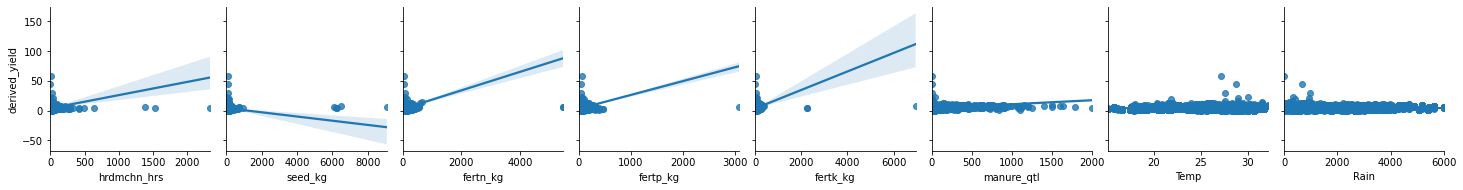

In [27]:
sns.pairplot(data_cott,x_vars = cols_indep ,y_vars= cols_dep ,kind='reg')

In [19]:
X=data_cott[cols_indep]
y=data_cott['derived_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

In [22]:
#Linear Regression
lm = LinearRegression(normalize=True)

model = lm.fit(X_train_sc,y_train)

predictions_train=lm.predict(X_train_sc)
predictions = lm.predict(X_test_sc)

df=pd.DataFrame(list(zip(predictions, y_test)), columns =['Pred', 'y']) 
print(df)

score_train=lm.score(X_train_sc,y_train)
accuracy_train=mean_squared_error(y_train,predictions_train)
score_test=lm.score(X_test_sc,y_test)
accuracy_test=mean_squared_error(y_test,predictions)
print('Linear_Regression Score:',score_train, np.sqrt(accuracy_train),score_test, np.sqrt(accuracy_test))
weights = pd.DataFrame(list(zip(cols_indep+['Temp','Rain'],lm.coef_)),columns=['Feature','Coefficient'])
print(weights)

           Pred         y
0      4.430415  4.501029
1      4.531389  4.627447
2      4.802094  4.932760
3      3.272724  1.796195
4      4.827960  6.889330
...         ...       ...
41407  4.098142  1.833480
41408  3.329179  3.527337
41409  4.026300  3.496929
41410  3.932493  4.225456
41411  4.429098  5.553860

[41412 rows x 2 columns]
Linear_Regression Score: 0.3820521232687111 1.3421047267470938 0.23736885308234135 1.487386478505412
       Feature  Coefficient
0  hrdmchn_hrs     0.101702
1      seed_kg    -0.078416
2     fertn_kg     0.736018
3     fertp_kg     0.154792
4     fertk_kg     0.368239
5   manure_qtl     0.145814
6         Temp    -0.207982
7         Rain     0.019339


In [21]:
lm = ElasticNet(alpha=0.1)

model = lm.fit(X_train_sc,y_train)

predictions_train=lm.predict(X_train_sc)
predictions = lm.predict(X_test_sc)

df=pd.DataFrame(list(zip(predictions, y_test)), columns =['Pred', 'y']) 
print(df[0:10])

score_train=lm.score(X_train_sc,y_train)
accuracy_train=mean_squared_error(y_train,predictions_train)
score_test=lm.score(X_test_sc,y_test)
accuracy_test=mean_squared_error(y_test,predictions)
print('Linear_Regression Score:',score_train, np.sqrt(accuracy_train),score_test, np.sqrt(accuracy_test))
print('Coeficients',lm.coef_)

       Pred         y
0  4.477618  4.501029
1  4.579664  4.627447
2  4.766760  4.932760
3  3.405392  1.796195
4  4.782909  6.889330
5  4.082042  3.674309
6  5.851800  9.323560
7  4.434644  4.663546
8  3.980456  4.060112
9  3.275429  3.503086
Linear_Regression Score: 0.3753075075683807 1.3494090765830247 0.25925056187746853 1.465892845516207
Coeficients [ 0.06406756 -0.03176466  0.67073319  0.15209286  0.32870142  0.10212208
 -0.12751158  0.        ]


In [24]:
#XGboost
xgb_reg=xgb.XGBRegressor()
xgb_model= xgb_reg.fit(X_train_sc,y_train)

predictions_xgb=xgb_model.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   4.672715  4.501029
1   4.604473  4.627447
2   4.274280  4.932760
3   2.550126  1.796195
4   5.340372  6.889330
5   4.458391  3.674309
6   7.901090  9.323560
7   4.694197  4.663546
8   3.884235  4.060112
9   3.454289  3.503086
10  5.331125  4.641233
11  4.255410  4.034392
12  1.712585  0.992063
13  3.984305  3.237985
14  4.079213  5.401235
15  4.507228  5.787037
16  3.722691  3.582451
17  3.580096  3.306878
18  5.798861  6.200397
19  1.921558  1.929012
0.9371960310826584


In [25]:
reg = svm.SVR(kernel='linear',C=0.3 , epsilon=0.01)
xgb_model= reg.fit(X_train_sc,y_train)
predictions_xgb= reg.predict(X_test_sc)
df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])
rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   4.658500  4.501029
1   4.431560  4.627447
2   4.653869  4.932760
3   3.017651  1.796195
4   4.509876  6.889330
5   4.105141  3.674309
6   5.703282  9.323560
7   4.285703  4.663546
8   3.712482  4.060112
9   3.006483  3.503086
10  5.282860  4.641233
11  3.458195  4.034392
12  2.331319  0.992063
13  4.162752  3.237985
14  4.128369  5.401235
15  4.659077  5.787037
16  2.908505  3.582451
17  4.166953  3.306878
18  5.364570  6.200397
19  2.709801  1.929012
1.5051564568701745


In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

xgb_model= rf.fit(X_train_sc,y_train)

predictions_xgb= rf.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   4.501029  4.501029
1   4.818237  4.627447
2   4.471662  4.932760
3   1.580670  1.796195
4   5.719809  6.889330
5   4.553729  3.674309
6   8.091787  9.323560
7   4.527368  4.663546
8   4.302515  4.060112
9   3.582422  3.503086
10  4.775895  4.641233
11  4.034405  4.034392
12  0.940178  0.992063
13  3.642623  3.237985
14  4.754672  5.401235
15  4.659254  5.787037
16  3.739606  3.582451
17  3.529777  3.306878
18  5.555536  6.200397
19  1.952995  1.929012
0.8334096152867834


In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

xgb_model= dt.fit(X_train_sc,y_train)

predictions_xgb= dt.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   4.501029  4.501029
1   5.990329  4.627447
2   4.478064  4.932760
3   1.566830  1.796195
4   5.787037  6.889330
5   6.327977  3.674309
6   7.853836  9.323560
7   5.070547  4.663546
8   4.678620  4.060112
9   3.674309  3.503086
10  4.776602  4.641233
11  4.436728  4.034392
12  0.881834  0.992063
13  3.169092  3.237985
14  6.771227  5.401235
15  3.858025  5.787037
16  3.720238  3.582451
17  3.417108  3.306878
18  5.511464  6.200397
19  1.837155  1.929012
1.1972395754519976


#### Modelling on Maize Data

In [3]:
data_cott = data_no_rs.loc[data_no_rs['crop'] == 'Maize']
print('Number of Entries: {}'.format(len(data_cott)))

Number of Entries: 15286


#### Preapring for the modelling

In [4]:
#### Variable Choices
cols_indep = ['casuallab_hrs','hrdanimllab_hrs','hrdmchn_hrs','seed_kg','fertn_kg','fertk_kg','ownirrimchn_hrs']
cols_dep =   ['derived_yield']

In [5]:
data_cott.loc[:,cols_indep] = data_cott.loc[:, cols_indep].div(data_cott['croparea_ha'], axis=0)
data_cott = data_cott.dropna()

C:\Users\Manan Arora\anaconda3\envs\manan\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


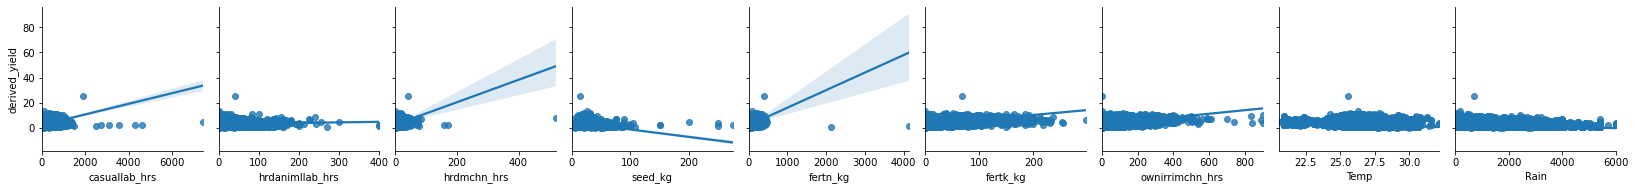

In [6]:
sns.pairplot(data_cott,x_vars = cols_indep+['Temp','Rain'] ,y_vars= cols_dep ,kind='reg')

In [7]:
X=data_cott[cols_indep+['Temp','Rain']]
y=data_cott['derived_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

In [8]:
#Linear Regression
lm = LinearRegression(normalize=True)

model = lm.fit(X_train_sc,y_train)

predictions_train=lm.predict(X_train_sc)
predictions = lm.predict(X_test_sc)

df=pd.DataFrame(list(zip(predictions, y_test)), columns =['Pred', 'y']) 
print(df)

score_train=lm.score(X_train_sc,y_train)
accuracy_train=mean_squared_error(y_train,predictions_train)
score_test=lm.score(X_test_sc,y_test)
accuracy_test=mean_squared_error(y_test,predictions)
print('Linear_Regression Score:',score_train, np.sqrt(accuracy_train),score_test, np.sqrt(accuracy_test))
weights = pd.DataFrame(list(zip(cols_indep+['Temp','Rain'],lm.coef_)),columns=['Feature','Coefficient'])
print(weights)

          Pred         y
0     2.550510  7.054674
1     5.719740  8.377425
2     1.691700  2.755732
3     3.534279  2.583499
4     6.217727  7.041262
...        ...       ...
4568  2.643324  4.409171
4569  2.290402  3.674309
4570  1.740039  1.377866
4571  3.704155  2.519526
4572  1.803181  0.787352

[4573 rows x 2 columns]
Linear_Regression Score: 0.5358136719386015 1.4402776510021598 0.5605074771520007 1.3779118458589474
           Feature  Coefficient
0    casuallab_hrs     0.279702
1  hrdanimllab_hrs    -0.053016
2      hrdmchn_hrs     0.181872
3          seed_kg    -0.169364
4         fertn_kg     0.361782
5         fertk_kg     0.506384
6  ownirrimchn_hrs     0.328420
7             Temp    -0.513321
8             Rain    -0.225064


In [9]:
lm = ElasticNet(alpha=0.1)

model = lm.fit(X_train_sc,y_train)

predictions_train=lm.predict(X_train_sc)
predictions = lm.predict(X_test_sc)

df=pd.DataFrame(list(zip(predictions, y_test)), columns =['Pred', 'y']) 
print(df[0:10])

score_train=lm.score(X_train_sc,y_train)
accuracy_train=mean_squared_error(y_train,predictions_train)
score_test=lm.score(X_test_sc,y_test)
accuracy_test=mean_squared_error(y_test,predictions)
print('Linear_Regression Score:',score_train, np.sqrt(accuracy_train),score_test, np.sqrt(accuracy_test))
print('Coeficients',lm.coef_)

       Pred         y
0  2.542857  7.054674
1  5.541651  8.377425
2  1.771669  2.755732
3  3.468898  2.583499
4  5.965879  7.041262
5  4.623407  2.893519
6  1.417996  0.551146
7  1.601227  1.653439
8  1.600434  0.878390
9  4.724282  5.257089
Linear_Regression Score: 0.5322997462697461 1.4457188782562667 0.5532577757744489 1.3892301159784588
Coeficients [ 0.26622873 -0.          0.15466935 -0.14074255  0.32574949  0.48512559
  0.30252442 -0.4641981  -0.2204589 ]


In [10]:
#XGboost
xgb_reg=xgb.XGBRegressor()
xgb_model= xgb_reg.fit(X_train_sc,y_train)

predictions_xgb=xgb_model.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   4.851448  7.054674
1   7.544844  8.377425
2   2.126898  2.755732
3   2.517057  2.583499
4   6.630271  7.041262
5   2.692825  2.893519
6   1.316835  0.551146
7   0.424290  1.653439
8   1.111503  0.878390
9   6.217545  5.257089
10  1.530425  1.361656
11  1.823223  2.755732
12  2.507516  3.582451
13  2.277692  1.377866
14  2.348617  2.755732
15  2.823525  2.755732
16  1.712855  1.763668
17  1.351822  1.079328
18  7.254440  8.267196
19  5.530034  4.271384
0.981580867270536


In [12]:
reg = svm.SVR(kernel='linear',C=0.3 , epsilon=0.01)
xgb_model= reg.fit(X_train_sc,y_train)
predictions_xgb= reg.predict(X_test_sc)
df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])
rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   1.869960  2.996858
1   2.235116  1.653439
2   1.659532  0.780791
3   1.855395  2.755732
4   1.378404  1.432981
5   1.523272  2.808222
6   1.704242  1.653439
7   1.570068  1.410935
8   2.058860  3.391670
9   2.386558  4.445914
10  2.003860  2.362056
11  1.938286  2.020870
12  1.768864  3.306878
13  1.594315  2.204586
14  1.804226  1.722332
15  1.903513  1.944322
16  1.454399  3.031305
17  2.087909  1.506467
18  1.812626  3.538224
19  1.722346  2.755732
0.9072306263484009


In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

xgb_model= rf.fit(X_train_sc,y_train)

predictions_xgb= rf.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   2.071861  2.996858
1   1.823313  1.653439
2   1.154894  0.780791
3   2.258589  2.755732
4   1.295830  1.432981
5   2.617196  2.808222
6   1.875598  1.653439
7   1.454262  1.410935
8   2.584334  3.391670
9   2.284936  4.445914
10  1.914357  2.362056
11  2.722641  2.020870
12  1.777774  3.306878
13  1.758371  2.204586
14  2.472680  1.722332
15  1.905238  1.944322
16  1.886533  3.031305
17  1.869461  1.506467
18  1.632485  3.538224
19  2.083128  2.755732
0.7432494702974345


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

xgb_model= dt.fit(X_train_sc,y_train)

predictions_xgb= dt.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   1.175779  2.996858
1   0.918577  1.653439
2   0.279348  0.780791
3   2.250514  2.755732
4   1.313566  1.432981
5   3.180066  2.808222
6   1.837155  1.653439
7   1.530962  1.410935
8   2.280606  3.391670
9   2.289377  4.445914
10  1.056660  2.362056
11  1.565575  2.020870
12  0.891360  3.306878
13  1.598325  2.204586
14  2.580662  1.722332
15  1.873898  1.944322
16  1.250161  3.031305
17  2.755732  1.506467
18  3.094155  3.538224
19  1.637068  2.755732
0.9903687576658806


In [13]:
from sklearn.neural_network import MLPRegressor

In [15]:
mlp= MLPRegressor(solver='sgd',max_iter=1000)
xgb_model= mlp.fit(X_train_sc,y_train)

predictions_xgb= mlp.predict(X_test_sc)

df_xgb=pd.DataFrame(list(zip(predictions_xgb, y_test)), columns =['Pred_xgb', 'y']) 
print(df_xgb[0:20])

rmse= np.sqrt(mean_squared_error(y_test,predictions_xgb))
print(rmse)

    Pred_xgb         y
0   3.092973  7.054674
1   7.531073  8.377425
2   2.022048  2.755732
3   2.522344  2.583499
4   6.200453  7.041262
5   4.233117  2.893519
6   1.260961  0.551146
7   1.373035  1.653439
8   1.511232  0.878390
9   4.924139  5.257089
10  1.439202  1.361656
11  1.974719  2.755732
12  2.980950  3.582451
13  1.911814  1.377866
14  1.606539  2.755732
15  3.196064  2.755732
16  1.408996  1.763668
17  1.142859  1.079328
18  6.801201  8.267196
19  3.307435  4.271384
1.2183935304817501
